In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
documents = [
    "Cats like milk",
    "Dogs like bones",
    "Cats and dogs are pets",
    "Milk is good for health",
    "Bones are part of the skeletal system"
]

In [ ]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X_tfidf = vectorizer.fit_transform(documents)

In [ ]:
vectorizer.get_feature_names_out()

array(['bones', 'cats', 'dogs', 'good', 'health', 'like', 'milk', 'pets',
       'skeletal'], dtype=object)

In [ ]:
lsa_model = TruncatedSVD(n_components = 2, random_state=42)
x_lsa = lsa_model.fit_transform(X_tfidf)

In [ ]:
print("LSA Output (Reduced Dimension): \n",x_lsa)

LSA Output (Reduced Dimension): 
 [[ 0.7209472  -0.43374813]
 [ 0.77550553  0.37173798]
 [ 0.62446251 -0.09647106]
 [ 0.28034039 -0.62879744]
 [ 0.38212248  0.68288187]]


In [ ]:
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(lsa_model.components_):
  terms_comp = zip(terms, comp)
  sorted_terms = sorted(terms_comp, key = lambda x: x[1], reverse = True)[:5]
  print(f"Topic {i}:")
  for term in sorted_terms:
    print(term[0], end = '')
  print("\n")

Topic 0:
likedogscatsbonesmilk

Topic 1:
bonesskeletaldogslikepets



In [ ]:
import re
import numpy as np
import pandas as pd
from scipy import linalg, spatial
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, SparsePCA,TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.utils.extmath import randomized_svd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
corpus = [
    "With all of the critical success Downey had experienced throughout his career, he had not appeared in a blockbuster film. That changed in 2008 when Downey starred in two critically and commercially successful films, Iron Man and Tropic Thunder. In the article Ben Stiller wrote for Downey's entry in the 2008 edition of The Time 100, he offered an observation on Downey's commercially successful summer at the box office.",
    "On June 14, 2010, Downey and his wife Susan opened their own production company called Team Downey. Their first project was The Judge.",
    "Robert John Downey Jr. is an American actor, producer, and singer. His career has been characterized by critical and popular success in his youth, followed by a period of substance abuse and legal troubles, before a resurgence of commercial success in middle age.",
    "In 2008, Downey was named by Time magazine among the 100 most influential people in the world, and from 2013 to 2015, he was listed by Forbes as Hollywood's highest-paid actor. His films have grossed over $14.4 billion worldwide, making him the second highest-grossing box-office star of all time."
          ]

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
filtered_document = []
filtered_text = []

for document in corpus:
  clean_document = " ".join(re.sub(r"[^A-Za-z\-]+"," ",document).split())
  document_tokens = word_tokenize(clean_document)
  for word in document_tokens:
    if word not in stop_words:
      filtered_document.append(word)
  filtered_text.append(' '.join(filtered_document))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
filtered_document

['With',
 'critical',
 'success',
 'Downey',
 'experienced',
 'throughout',
 'career',
 'appeared',
 'blockbuster',
 'film',
 'That',
 'changed',
 'Downey',
 'starred',
 'two',
 'critically',
 'commercially',
 'successful',
 'films',
 'Iron',
 'Man',
 'Tropic',
 'Thunder',
 'In',
 'article',
 'Ben',
 'Stiller',
 'wrote',
 'Downey',
 'entry',
 'edition',
 'The',
 'Time',
 'offered',
 'observation',
 'Downey',
 'commercially',
 'successful',
 'summer',
 'box',
 'office',
 'On',
 'June',
 'Downey',
 'wife',
 'Susan',
 'opened',
 'production',
 'company',
 'called',
 'Team',
 'Downey',
 'Their',
 'first',
 'project',
 'The',
 'Judge',
 'Robert',
 'John',
 'Downey',
 'Jr',
 'American',
 'actor',
 'producer',
 'singer',
 'His',
 'career',
 'characterized',
 'critical',
 'popular',
 'success',
 'youth',
 'followed',
 'period',
 'substance',
 'abuse',
 'legal',
 'troubles',
 'resurgence',
 'commercial',
 'success',
 'middle',
 'age',
 'In',
 'Downey',
 'named',
 'Time',
 'magazine',
 'among',


In [ ]:
filtered_text

['With critical success Downey experienced throughout career appeared blockbuster film That changed Downey starred two critically commercially successful films Iron Man Tropic Thunder In article Ben Stiller wrote Downey entry edition The Time offered observation Downey commercially successful summer box office',
 'With critical success Downey experienced throughout career appeared blockbuster film That changed Downey starred two critically commercially successful films Iron Man Tropic Thunder In article Ben Stiller wrote Downey entry edition The Time offered observation Downey commercially successful summer box office On June Downey wife Susan opened production company called Team Downey Their first project The Judge',
 'With critical success Downey experienced throughout career appeared blockbuster film That changed Downey starred two critically commercially successful films Iron Man Tropic Thunder In article Ben Stiller wrote Downey entry edition The Time offered observation Downey c

In [ ]:
vectorizer = CountVectorizer()
counts_matrix = vectorizer.fit_transform(filtered_text)
feature_names = vectorizer.get_feature_names_out()
count_matrix_df = pd.DataFrame(counts_matrix.toarray(), columns = feature_names)
count_matrix_df.index = ['Document 1' , 'Document 2','Document 3','Document 4']
print("Word Frequency matrix: \n", count_matrix_df)

Word Frequency matrix: 
             abuse  actor  age  american  among  appeared  article  ben  \
Document 1      0      0    0         0      0         1        1    1   
Document 2      0      0    0         0      0         1        1    1   
Document 3      1      1    1         1      0         1        1    1   
Document 4      1      2    1         1      1         1        1    1   

            billion  blockbuster  ...  time  tropic  troubles  two  wife  \
Document 1        0            1  ...     1       1         0    1     0   
Document 2        0            1  ...     1       1         0    1     1   
Document 3        0            1  ...     1       1         1    1     1   
Document 4        1            1  ...     3       1         1    1     1   

            with  world  worldwide  wrote  youth  
Document 1     1      0          0      1      0  
Document 2     1      0          0      1      0  
Document 3     1      0          0      1      1  
Document 4     1   

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(filtered_text)
print(X.shape)
print(feature_names)
num_clusters = 4
km = KMeans(n_clusters = num_clusters)
km.fit(X)
clusters = km.labels_.tolist()
print(clusters)

(4, 77)
['abuse' 'actor' 'age' 'american' 'among' 'appeared' 'article' 'ben'
 'billion' 'blockbuster' 'box' 'called' 'career' 'changed' 'characterized'
 'commercial' 'commercially' 'company' 'critical' 'critically' 'downey'
 'edition' 'entry' 'experienced' 'film' 'films' 'first' 'followed'
 'forbes' 'grossed' 'grossing' 'highest' 'his' 'hollywood' 'in'
 'influential' 'iron' 'john' 'jr' 'judge' 'june' 'legal' 'listed'
 'magazine' 'making' 'man' 'middle' 'named' 'observation' 'offered'
 'office' 'on' 'opened' 'paid' 'people' 'period' 'popular' 'producer'
 'production' 'project' 'resurgence' 'robert' 'second' 'singer' 'star'
 'starred' 'stiller' 'substance' 'success' 'successful' 'summer' 'susan'
 'team' 'that' 'the' 'their' 'throughout' 'thunder' 'time' 'tropic'
 'troubles' 'two' 'wife' 'with' 'world' 'worldwide' 'wrote' 'youth']
[3, 1, 0, 2]


In [ ]:
U, Sigma, VT = randomized_svd(X, n_components = 10, n_iter = 100, random_state = 122)
svd_model = TruncatedSVD(n_components = 2, algorithm = 'randomized',n_iter = 100, random_state = 122)
svd_model.fit(X)
print(U.shape)

for i, comp in enumerate(VT):
  terms_comp = zip(feature_names, comp)
  sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
  print("Cluster "+str(i)+":")
  for t in sorted_terms:
    print(t[0])
  print(" ")

(4, 4)
Cluster 0:
critically
commercial
star
singer
called
company
successful
 
Cluster 1:
actor
grossed
age
american
changed
characterized
films
 
Cluster 2:
box
commercially
influential
iron
named
paid
people
 
Cluster 3:
box
commercially
influential
iron
named
paid
people
 


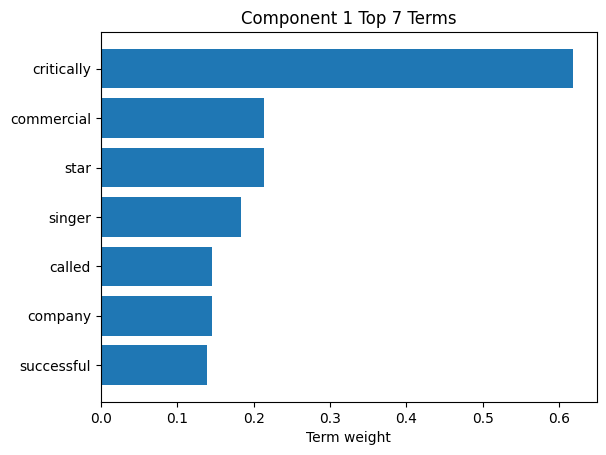

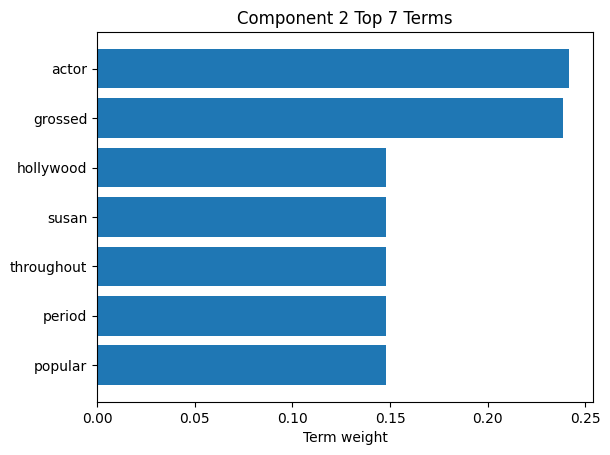

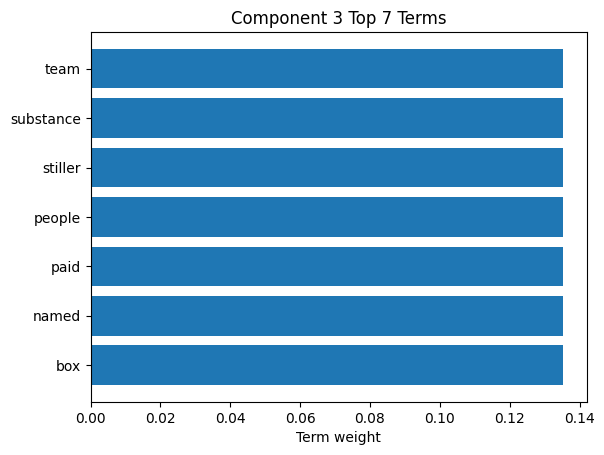

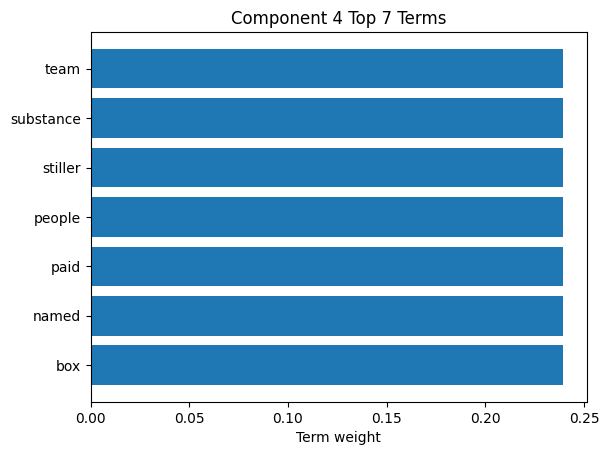

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# VT: (n_components=10 × n_features)
# feature_names: list/array of your vocabulary
n_top = 7

for i, comp in enumerate(VT):
    # find indices of the top‐n weights
    top_idx = np.argsort(comp)[-n_top:][::-1]
    top_terms = [feature_names[j] for j in top_idx]
    top_weights = comp[top_idx]

    plt.figure()
    plt.barh(top_terms, top_weights)
    plt.gca().invert_yaxis()       # highest weight on top
    plt.xlabel("Term weight")
    plt.title(f"Component {i+1} Top {n_top} Terms")
    plt.show()
